# Worksheet

[FORM](https://forms.gle/xkYAwSmeGbbE1jNM9)

### K Nearest Neighbors

In [21]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

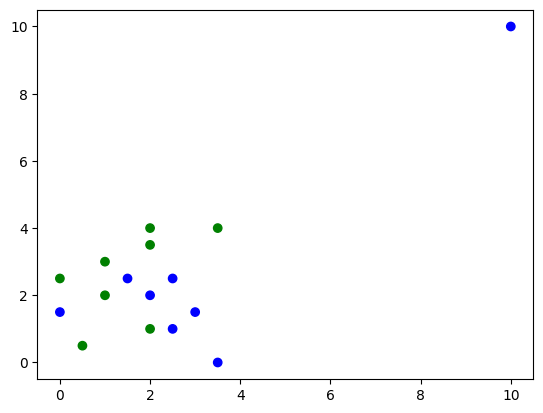

In [22]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data['Attribute A'], data['Attribute B'], color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

In [23]:
data["Attribute A"] = data["Attribute A"][:-1]
data["Attribute B"] = data["Attribute B"][:-1]
data["Class"] = data["Class"][:-1]

data

{'Attribute A': [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0.0],
 'Attribute B': [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5],
 'Class': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1]}

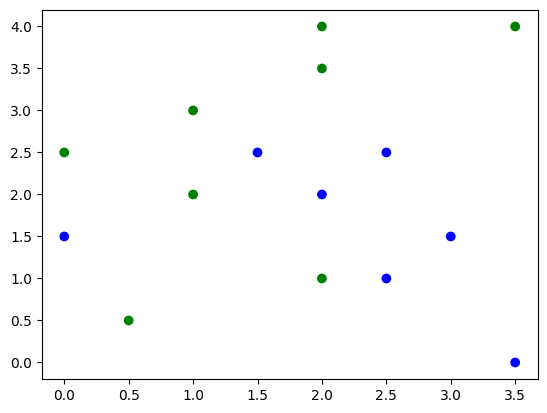

In [24]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data['Attribute A'], data['Attribute B'], color=colors[data["Class"]].tolist())
plt.show()

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

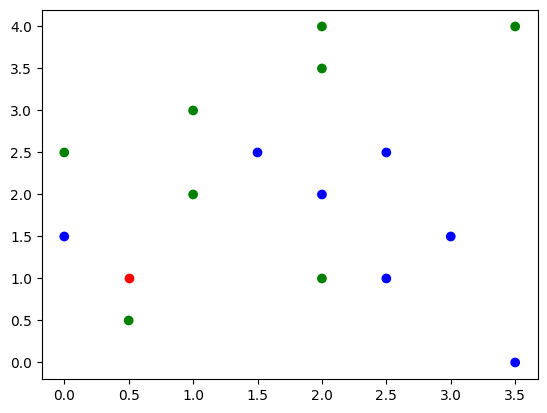

In [26]:
new_point = [0.5, 1]

colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data['Attribute A'], data['Attribute B'], color=colors[data["Class"]].tolist())
plt.scatter(new_point[0], new_point[1], color="red")
plt.show()

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

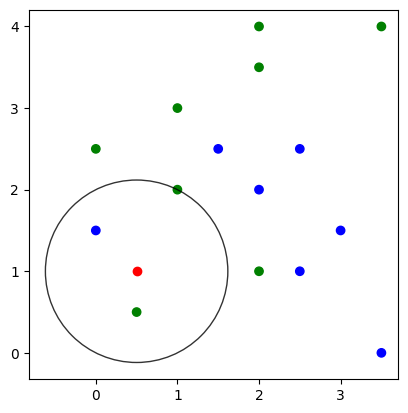

In [62]:
def n_closest_to(example, n, k=3):
    distances = []
    
    for i in range(len(example["Attribute A"])):
        point = np.array([data['Attribute A'][i], data['Attribute B'][i]])
        distance = np.linalg.norm(point - n)
        distances.append(distance)

    closest_points = np.argsort(distances)[:k]
    
    return closest_points, [distances[i] for i in closest_points]

closest_points_index, closest_distances = n_closest_to(data, new_point)


location = ( new_point[0] , new_point[1] )
radius = max(closest_distances)
_, axes = plt.subplots()
colors = np.array([x for x in 'bgrcmyk'])
axes.scatter(data["Attribute A"], data["Attribute B"], label='Data Points', color=colors[data["Class"]].tolist())
axes.scatter(location[0], location[1], color='red', label='New Point', zorder=5)
cir = plt.Circle(location, radius, fill = False, alpha=0.8)
axes.add_patch(cir)
axes.set_aspect('equal') # necessary so that the circle is not oval
plt.show()

f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [46]:
def majority(points, data):
    class_counts = {}
    
    for i in points:
        label = data["Class"][i]
        if label in class_counts:
            class_counts[label] += 1
        else:
            class_counts[label] = 1
    
    # Find the majority class manually
    majority_class = max(class_counts, key=class_counts.get)
    
    return majority_class

In [50]:
majority_class = majority(closest_points_index, data)

print(majority_class)

1


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [66]:
count = 0
for i in range(len(data["Attribute A"])):
    actual_class = data["Class"][i]
    training_set = [data["Attribute A"][i], data["Attribute B"][i]]
    closest_points_index, closest_distances = n_closest_to(data, training_set) 
    prediction = majority(closest_points_index, data)
    if prediction == actual_class:
        count += 1

print("overall accuracy = ", count/len(data["Attribute A"]))

overall accuracy =  0.8
